In [7]:
# loading libraries
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt

In [178]:
# importing dataset
df = pd.read_csv('weight-height.csv')

In [179]:
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


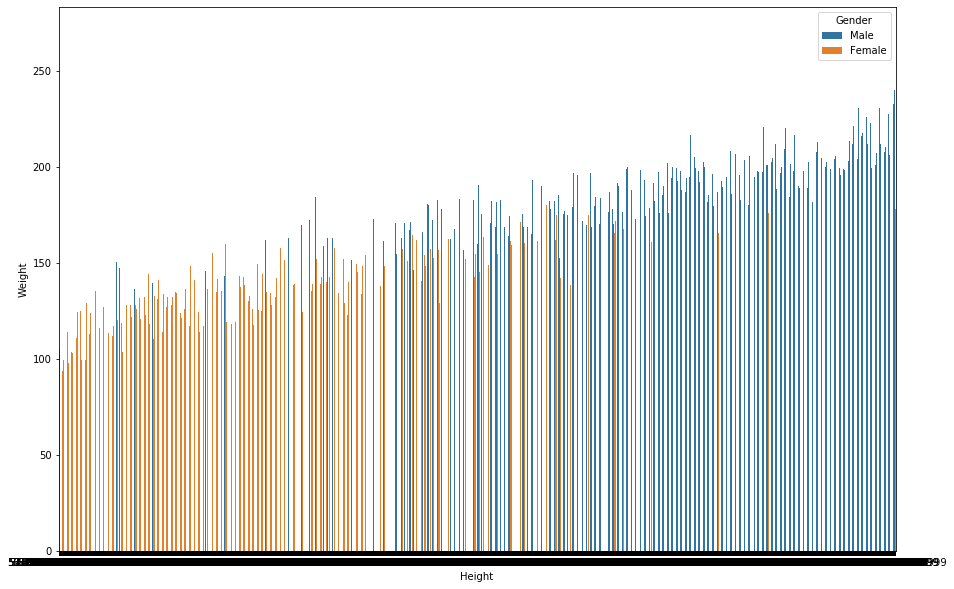

In [34]:
# correlation between Gender based Height and Weight 
plt.figure(figsize = (15,10))
sns.barplot(data=df, x='Height',y='Weight',hue='Gender')

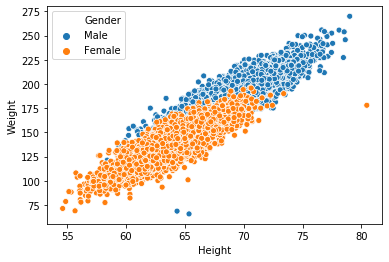

In [35]:
# correlation between Gender based Height and Weight 
sns.scatterplot(
    data=df, x="Height", y="Weight", hue="Gender",
    sizes=(20, 200), legend="full"
)

In [122]:
# scaling and encoding libraries
from sklearn.preprocessing import MinMaxScaler,LabelEncoder
scaler = MinMaxScaler()
encoder = LabelEncoder()

In [123]:
# Encoding and scaling data
from pandas.core.dtypes.common import is_numeric_dtype
for column in df.columns:
    if is_numeric_dtype(df[column]):
        df[column] = scaler.fit_transform(df[[column]])
        continue
    df[column] = encoder.fit_transform(df[column])

In [124]:
df.head()

,Gender,Height,Weight
0,1,0.744399,0.862415
1,1,0.548328,0.472703
2,1,0.754583,0.719657
3,1,0.662487,0.755412
4,1,0.590905,0.688360


In [202]:
# Information about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8555 entries, 0 to 8554
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Gender  8555 non-null   object 
 1   Height  8555 non-null   float64
 2   Weight  8555 non-null   float64
dtypes: float64(2), object(1)
memory usage: 200.6+ KB


In [126]:
# descriptive statistics
df.describe()

,Gender,Height,Weight
count,8555.000000,8555.000000,8555.000000
mean,0.584454,0.471993,0.488972
std,0.492845,0.149090,0.156917
min,0.000000,0.000000,0.000000
25%,0.000000,0.361583,0.362847
50%,1.000000,0.478806,0.503118
75%,1.000000,0.580168,0.611559
max,1.000000,1.000000,1.000000


In [127]:
x = df.drop('Weight',axis=1)
y = df.Weight

In [128]:
x.head()

,Gender,Height
0,1,0.744399
1,1,0.548328
2,1,0.754583
3,1,0.662487
4,1,0.590905


In [129]:
y.head()

0    0.862415
1    0.472703
2    0.719657
3    0.755412
4    0.688360
Name: Weight, dtype: float64

In [18]:
# splitting data for testing and training
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y,train_size=.3)

In [19]:
xtrain.head()

,Gender,Height
3162,1,0.551467
140,1,0.551355
3047,1,0.576173
2063,1,0.516827
6639,0,0.314077


In [20]:
ytrain.head()

3162    0.618225
140     0.508188
3047    0.591625
2063    0.632553
6639    0.217728
Name: Weight, dtype: float64

## Linear Regression

In [21]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [22]:
lr.fit(xtrain,ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [23]:
# predict for a set
lr.predict([[1.0,0.664220]])

array([0.67291622])

### Evaluation of Linear Regression

In [24]:
# training accuracy
lr.score(xtrain,ytrain)

0.9019340062547945

In [25]:
# testing accuracy/ R squared Value
lr.score(xtest,ytest)

0.8990340769523023

In [26]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [27]:
pred = lr.predict(xtest)

In [28]:
# MSE
mean_squared_error(ytest,pred)

0.002489382815066405

In [29]:
# MAE
mean_absolute_error(ytest,pred)

0.03936851330019256

In [30]:
# coefficient of determination
r2_score(ytest,pred)

0.8990340769523022

## KNN Regressor

In [63]:
from sklearn.neighbors import KNeighborsRegressor
knr = KNeighborsRegressor()

In [64]:
knr.fit(xtrain,ytrain)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                    weights='uniform')

In [65]:
# predict for a set
knr.predict([[1,70]])

array([0.82395397])

### Evaluation of KNN Regressor

In [66]:
#Training Accuracy
knr.score(xtrain,ytrain)

0.9211518734987775

In [67]:
#Testing Accuracy
knr.score(xtest,ytest)

0.8798623058445141

In [68]:
from sklearn.metrics import mean_squared_error

In [71]:
# prediction for testing dataset
pred = knr.predict(xtest)
pred

array([0.40543375, 0.60259229, 0.48116714, ..., 0.26152244, 0.49350545,
       0.60235419])

In [74]:
# MSE
mean_squared_error(ytest,pred)

0.002962075740456371

### Tuning

In [75]:
from sklearn.model_selection import RandomizedSearchCV

In [96]:
n_neighbors = np.random.randint(5,100,50)
weights = ['uniform', 'distance']
params = {
    'n_neighbors': n_neighbors,
    'weights' : weights
}

In [97]:
params

{'n_neighbors': array([95, 60, 29, 18, 25, 69, 73,  8, 64, 36, 84, 54,  9, 85, 92, 45, 49,
        62, 64, 13, 87, 66, 20, 82, 66, 70, 18, 40, 75, 10, 50,  7, 37, 83,
        72, 94, 67, 31, 65, 26, 88, 84, 47, 16, 64, 92, 16, 51, 41, 62]),
 'weights': ['uniform', 'distance']}

In [98]:
knr = KNeighborsRegressor(n_jobs=-1)

In [102]:
rs = RandomizedSearchCV(knr,params)

In [104]:
rs.fit(xtrain,ytrain)

RandomizedSearchCV(cv=None, error_score=nan,
                   estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30,
                                                 metric='minkowski',
                                                 metric_params=None, n_jobs=-1,
                                                 n_neighbors=5, p=2,
                                                 weights='uniform'),
                   iid='deprecated', n_iter=10, n_jobs=None,
                   param_distributions={'n_neighbors': array([95, 60, 29, 18, 25, 69, 73,  8, 64, 36, 84, 54,  9, 85, 92, 45, 49,
       62, 64, 13, 87, 66, 20, 82, 66, 70, 18, 40, 75, 10, 50,  7, 37, 83,
       72, 94, 67, 31, 65, 26, 88, 84, 47, 16, 64, 92, 16, 51, 41, 62]),
                                        'weights': ['uniform', 'distance']},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=False, scoring=None, verbose=0)

In [105]:
pd.DataFrame(rs.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_weights,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.010630,0.008940,0.017875,0.002932,distance,64,"{'weights': 'distance', 'n_neighbors': 64}",0.892928,0.886049,0.866592,0.882085,0.888025,0.883136,0.008979,8
1,0.005000,0.000004,0.016996,0.002448,distance,64,"{'weights': 'distance', 'n_neighbors': 64}",0.892928,0.886049,0.866592,0.882085,0.888025,0.883136,0.008979,8
2,0.005004,0.000001,0.014995,0.000001,distance,16,"{'weights': 'distance', 'n_neighbors': 16}",0.887581,0.881456,0.859843,0.873204,0.883025,0.877022,0.009766,10
3,0.005000,0.000002,0.016284,0.001938,uniform,62,"{'weights': 'uniform', 'n_neighbors': 62}",0.903305,0.895889,0.886012,0.900630,0.898470,0.896861,0.005949,1
4,0.004998,0.000002,0.018000,0.002447,uniform,94,"{'weights': 'uniform', 'n_neighbors': 94}",0.899619,0.891904,0.883906,0.899170,0.896548,0.894230,0.005845,5
5,0.004999,0.000002,0.014999,0.000001,uniform,20,"{'weights': 'uniform', 'n_neighbors': 20}",0.907338,0.894841,0.884607,0.895442,0.901179,0.896682,0.007543,2
6,0.005000,0.000003,0.018143,0.002284,distance,82,"{'weights': 'distance', 'n_neighbors': 82}",0.893086,0.886194,0.866974,0.882979,0.888266,0.883500,0.008891,6
7,0.004998,0.000004,0.016998,0.002450,distance,69,"{'weights': 'distance', 'n_neighbors': 69}",0.892973,0.886214,0.866687,0.882384,0.888173,0.883286,0.008974,7
8,0.006001,0.002000,0.017996,0.002448,uniform,83,"{'weights': 'uniform', 'n_neighbors': 83}",0.901136,0.893934,0.884919,0.899238,0.897559,0.895357,0.005732,4
9,0.005597,0.001197,0.017116,0.002082,uniform,69,"{'weights': 'uniform', 'n_neighbors': 69}",0.902578,0.895902,0.885692,0.899732,0.898647,0.896510,0.005817,3


In [106]:
rs.best_params_

{'weights': 'uniform', 'n_neighbors': 62}

In [108]:
nrs = rs.best_estimator_
nrs

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=-1, n_neighbors=62, p=2,
                    weights='uniform')

In [109]:
nrs.fit(xtrain,ytrain)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=-1, n_neighbors=62, p=2,
                    weights='uniform')

### Evaluation

In [114]:
nrs.score(xtrain,ytrain)

0.9007895006820974

In [110]:
nrs.score(xtest,ytest)

0.8951833964672039

In [111]:
from sklearn.metrics import mean_squared_error

In [112]:
pred = nrs.predict(xtest)

In [113]:
mean_squared_error(ytest,pred)

0.0025843239351647854

In [115]:
nrs.predict([[1,70]])

array([0.77183087])

### Comparison

In [199]:
_df = pd.DataFrame([['KNN (default)',0.8798623058445141] , ['KNN (after tuning)',0.8951833964672039]],columns=['Method','Accuracy'])

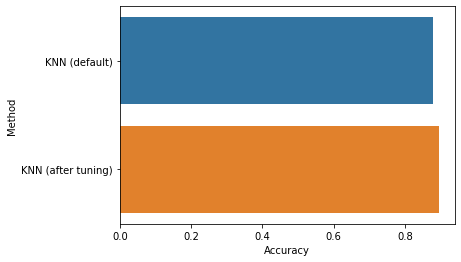

In [200]:
sns.barplot(x='Accuracy',y='Method',data=_df)

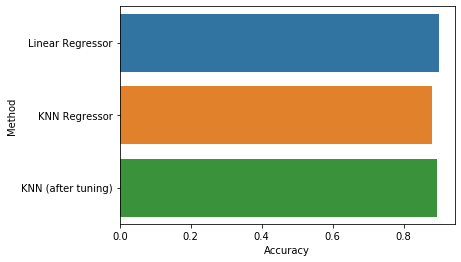

In [218]:
_df = pd.DataFrame([['Linear Regressor', 0.8990340769523023] , ['KNN Regressor',0.8798623058445141],['KNN (after tuning)',0.8951833964672039]], columns= ['Method','Accuracy'])
sns.barplot(x='Accuracy',y='Method',data=_df)

## KNN Classifier

In [130]:
# separating values
x = df.drop('Gender',axis=1)
y = df.Gender

In [131]:
x

,Height,Weight
0,0.744399,0.862415
1,0.548328,0.472703
2,0.754583,0.719657
3,0.662487,0.755412
4,0.590905,0.688360
...,...,...
8550,0.227115,0.219311
8551,0.340900,0.314097
8552,0.424540,0.441520
8553,0.495995,0.420638


In [132]:
y

0       1
1       1
2       1
3       1
4       1
       ..
8550    0
8551    0
8552    0
8553    0
8554    0
Name: Gender, Length: 8555, dtype: int32

In [134]:
# Splitting dataset for training and testing
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=.7,random_state=42)

In [135]:
xtrain.head()

,Height,Weight
1735,0.539772,0.590673
2823,0.431680,0.517239
6781,0.100096,0.186978
6336,0.393841,0.365413
2475,0.301345,0.385707


In [138]:
xtest.head()

,Height,Weight
6006,0.395995,0.410795
1197,0.552372,0.645720
2862,0.632773,0.552232
6497,0.314338,0.370027
2860,0.579146,0.634361


In [140]:
from sklearn.neighbors import KNeighborsClassifier
knc = KNeighborsClassifier()

In [141]:
knc.fit(xtrain,ytrain)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

### Evaluation

In [142]:
#training accuracy
knc.score(xtrain,ytrain)

0.9275136399064692

In [143]:
#testing accuracy
knc.score(xtest,ytest)

0.9100016697278344

In [144]:
pred = knc.predict(xtest)

In [147]:
from sklearn.metrics import accuracy_score,confusion_matrix,plot_roc_curve,classification_report

In [203]:
# Accuracy
accuracy_score(ytest,pred)

0.9100016697278344

In [148]:
confusion_matrix(ytest,pred)

array([[2208,  311],
       [ 228, 3242]], dtype=int64)

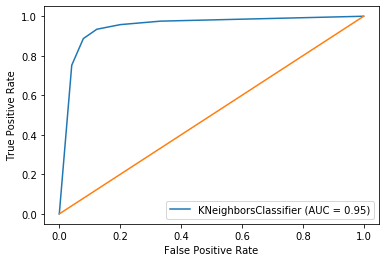

In [152]:
plot_roc_curve(knc,xtest,ytest)
plt.plot([0,1],[0,1])

In [149]:
print(classification_report(ytest,pred))

              precision    recall  f1-score   support

           0       0.91      0.88      0.89      2519
           1       0.91      0.93      0.92      3470

    accuracy                           0.91      5989
   macro avg       0.91      0.91      0.91      5989
weighted avg       0.91      0.91      0.91      5989



### Tuning

In [156]:
n_neighbors = np.random.randint(5,100,20)
weights = ['uniform', 'distance']
params = {
    'n_neighbors': n_neighbors,
    'weights':weights
}

In [157]:
params

{'n_neighbors': array([26, 42, 30, 65, 91, 56, 30, 64,  6, 11, 77, 88, 12, 79, 54, 63, 49,
        16, 84, 54]),
 'weights': ['uniform', 'distance']}

In [153]:
from sklearn.model_selection import RandomizedSearchCV

In [159]:
rsc =RandomizedSearchCV(KNeighborsClassifier(),params,n_jobs=-1)

In [160]:
rsc.fit(xtrain,ytrain)

RandomizedSearchCV(cv=None, error_score=nan,
                   estimator=KNeighborsClassifier(algorithm='auto',
                                                  leaf_size=30,
                                                  metric='minkowski',
                                                  metric_params=None,
                                                  n_jobs=None, n_neighbors=5,
                                                  p=2, weights='uniform'),
                   iid='deprecated', n_iter=10, n_jobs=-1,
                   param_distributions={'n_neighbors': array([26, 42, 30, 65, 91, 56, 30, 64,  6, 11, 77, 88, 12, 79, 54, 63, 49,
       16, 84, 54]),
                                        'weights': ['uniform', 'distance']},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=False, scoring=None, verbose=0)

In [161]:
# Best accuracy score
rsc.best_score_

0.9185473411154346

In [162]:
# Best parameters
rsc.best_params_

{'weights': 'uniform', 'n_neighbors': 49}

In [165]:
nrsc = rsc.best_estimator_
nrsc

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=49, p=2,
                     weights='uniform')

In [166]:
nrsc.fit(xtrain,ytrain)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=49, p=2,
                     weights='uniform')

In [169]:
# Training Accuracy
nrsc.score(xtrain,ytrain)

0.9189399844115355

In [168]:
# Testing Accuracy
nrsc.score(xtest,ytest)

0.9095007513775255

In [167]:
# Prediction
pred = nrsc.predict(xtest)

array([0, 1, 1, ..., 1, 0, 1])

In [170]:
from sklearn.metrics import accuracy_score,confusion_matrix,plot_roc_curve,classification_report

In [171]:
# Accuracy
accuracy_score(ytest,pred)

0.9100016697278344

In [172]:
# Confusion Matrix
confusion_matrix(ytest,pred)

array([[2208,  311],
       [ 228, 3242]], dtype=int64)

In [174]:
# Classification Report
print(classification_report(ytest,pred))

              precision    recall  f1-score   support

           0       0.91      0.88      0.89      2519
           1       0.91      0.93      0.92      3470

    accuracy                           0.91      5989
   macro avg       0.91      0.91      0.91      5989
weighted avg       0.91      0.91      0.91      5989



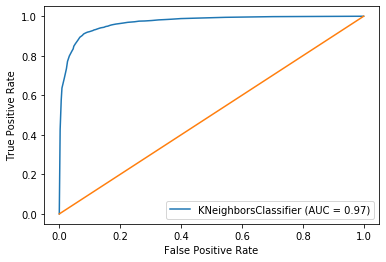

In [177]:
# ROC AUC Plot
plot_roc_curve(nrsc,xtest,ytest)
plt.plot([0,1],[0,1])

## Comparison

In [216]:
_temp_df = pd.DataFrame([['KNN',0.9100016697278344],['KNN (after Tuning)',0.9095007513775255]],columns=['Methods','Accuracy'])

Text(0.5, 1.0, 'Accuracy with default KNN and After tuning')

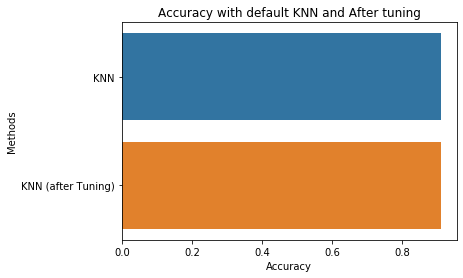

In [219]:
sns.barplot(x='Accuracy',y='Methods',data=_temp_df)
# plt.xlabel("accuracy with default KNN and After tuning")
plt.title("Accuracy with default KNN and After tuning")